# Structural Alert Filters

Structural filters can be used to triage or flag compounds that contains a specific molecular pattern or featre that can often be unwanted or undesired. Medchem proposes 3 types of structural filters:

- **Common Alerts**: a list of filters curated and aggregated from ChEMBL and the public litterature. The majority of this list has been curated by [Patrick Walters](https://twitter.com/wpwalters) and proposed at <https://github.com/PatWalters/rd_filters>.
- **NIBR Filters**: Novartis screening deck originally proposed in [Evolution of Novartis’ Small Molecule Screening Deck Design](https://doi.org/10.1021/acs.jmedchem.0c01332).
- **Eli Lilly Demerits Filters**: A set of 275 rules used to identify compounds that may interfere with biological assays. Originally proposed in [Rules for Identifying Potentially Reactive or Promiscuous Compounds](https://doi.org/10.1021/jm301008n).

In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import datamol as dm
import pandas as pd

import medchem as mc

## Common Alerts

You can list all the available default filters.

In [ ]:
mc.structural.CommonAlertsFilters.list_default_available_alerts()

,rule_set_name,smarts,catalog_description,rule_set,source
0,Glaxo,55,Glaxo Wellcome Hard filters,1,ChEMBL
1,Dundee,105,University of Dundee NTD Screening Library Fil...,2,ChEMBL
2,BMS,180,Bristol-Myers Squibb HTS Deck filters,3,ChEMBL
3,PAINS,481,PAINS filters,4,ChEMBL
4,SureChEMBL,166,SureChEMBL Non-MedChem Friendly SMARTS,5,ChEMBL
5,MLSMR,116,NIH MLSMR Excluded Functionality filters (MLSMR),6,ChEMBL
6,Inpharmatica,91,Unwanted fragments derived by Inpharmatica Ltd.,7,ChEMBL
7,LINT,57,Pfizer lint filters (lint),8,ChEMBL
8,Alarm-NMR,75,Reactive False Positives in Biochemical Screen...,9,Litterature
9,AlphaScreen-Hitters,6,Structural filters for compounds that may be a...,10,Litterature


Create a `CommonAlertsFilters` object in order to filter a list of molecules.

In [ ]:
alerts = mc.structural.CommonAlertsFilters()

By default only the "BMS" set is used but you can specify your own set(s):

In [ ]:
alerts2 = mc.structural.CommonAlertsFilters(alerts_set=["LINT", "Toxicophore"])

Let's load a few molecules.

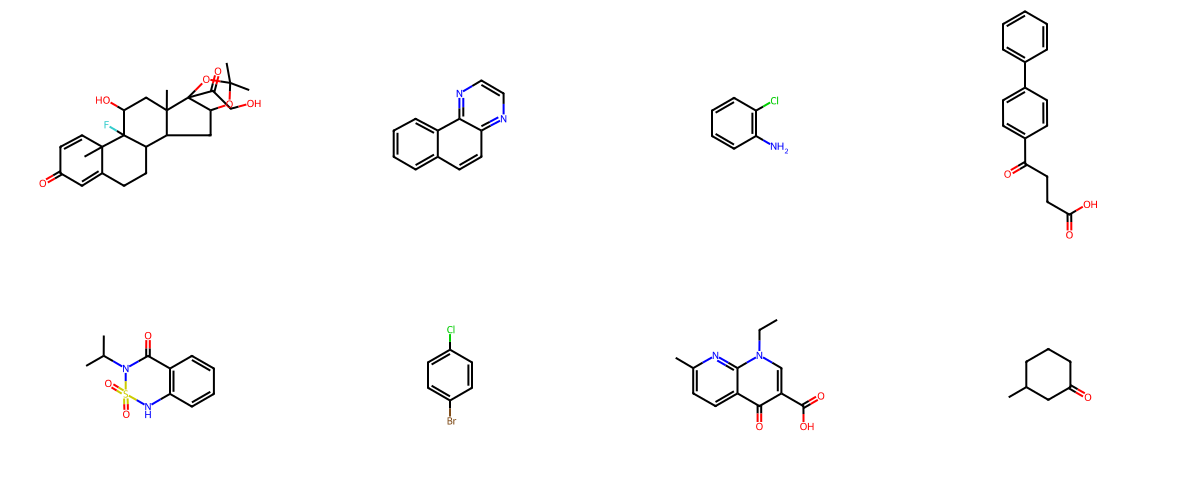

In [ ]:
# Load a dataset
data = dm.data.solubility()
data = data.sample(50, random_state=20)

dm.to_image(data.iloc[:8]["mol"].tolist(), mol_size=(300, 250))

Apply the filters on the list of molecules.

In [ ]:
results = alerts(
    mols=data["mol"].tolist(),
    n_jobs=-1,
    progress=True,
    progress_leave=True,
    scheduler="auto",
)

results.head()

Filter by alerts:   0%|          | 0/50 [00:00<?, ?it/s]

,mol,pass_filter,status,reasons
0,<rdkit.Chem.rdchem.Mol object at 0x7f4e549e5690>,True,ok,None
1,<rdkit.Chem.rdchem.Mol object at 0x7f4e53fc5d20>,False,exclude,Polycyclic aromatic hydrocarbon
2,<rdkit.Chem.rdchem.Mol object at 0x7f4e549ccba0>,False,exclude,aniline
3,<rdkit.Chem.rdchem.Mol object at 0x7f4e549ce8f0>,True,ok,None
4,<rdkit.Chem.rdchem.Mol object at 0x7f4e549b9ee0>,True,ok,None


Display the results.

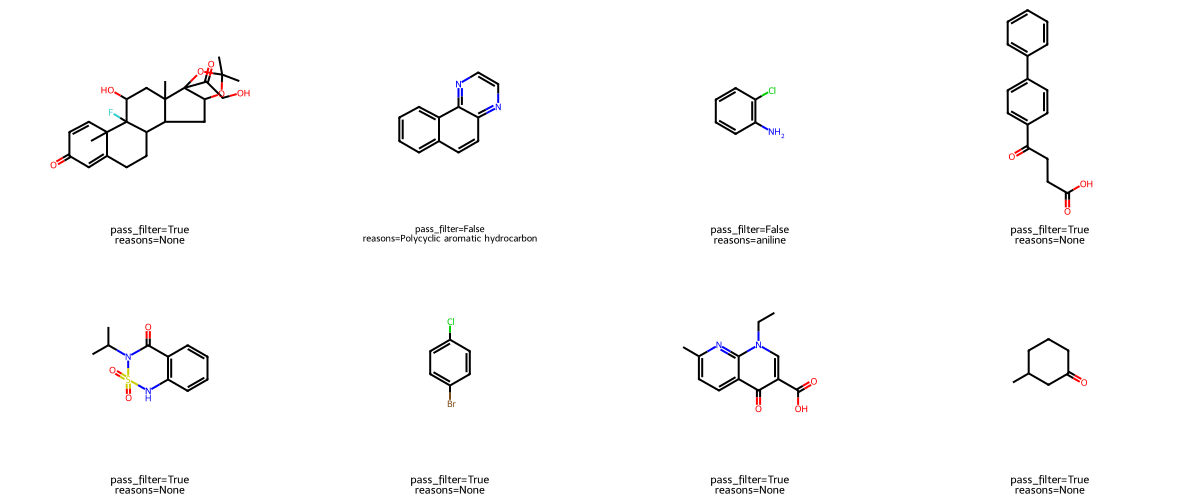

In [ ]:
rows = results.iloc[:8]

mols = rows["mol"].iloc[:8].tolist()
legends = (
    rows[["pass_filter", "reasons"]].apply(lambda x: f"pass_filter={x[0]}\nreasons={x[1]}", axis=1).tolist()
)

dm.to_image(mols, legends=legends, mol_size=(300, 250))

## NIBR Filters

Load the NIBR filters.

In [ ]:
nibr_filters = mc.structural.NIBRFilters()

Let's load a few molecules.

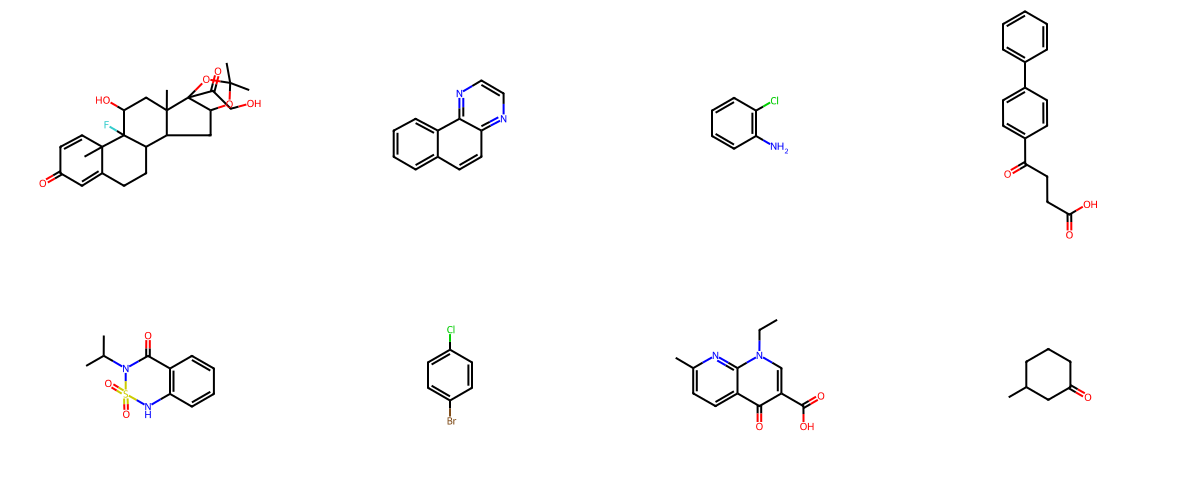

In [ ]:
# Load a dataset
data = dm.data.solubility()
data = data.sample(50, random_state=20)

dm.to_image(data.iloc[:8]["mol"].tolist(), mol_size=(300, 250))

Apply the filters on the list of molecules.

In [ ]:
results = nibr_filters(
    mols=data["mol"].tolist(),
    n_jobs=-1,
    progress=True,
    progress_leave=True,
    scheduler="threads",
    keep_details=True,
)

results.head()

NIBR filtering:   0%|          | 0/50 [00:00<?, ?it/s]

,mol,reasons,severity,status,n_covalent_motif,special_mol,pass_filter,details
0,<rdkit.Chem.rdchem.Mol object at 0x7f4e517642e0>,ketals _or_acetals_min(1); steroid_non_arom_mi...,10,exclude,0,2,False,"{'name': {0: 'ketals _or_acetals_min(1)', 1: '..."
1,<rdkit.Chem.rdchem.Mol object at 0x7f4e515b71b0>,polycyclic_systems_14_atoms_min(1),0,annotations,0,1,True,{'name': {0: 'polycyclic_systems_14_atoms_min(...
2,<rdkit.Chem.rdchem.Mol object at 0x7f4e5176e030>,None,0,ok,0,0,True,NaN
3,<rdkit.Chem.rdchem.Mol object at 0x7f4e5176c3c0>,None,0,ok,0,0,True,NaN
4,<rdkit.Chem.rdchem.Mol object at 0x7f4e515bcb30>,None,0,ok,0,0,True,NaN


In [ ]:
results.columns.tolist()

['mol',
 'reasons',
 'severity',
 'status',
 'n_covalent_motif',
 'special_mol',
 'pass_filter',
 'details']

Display the results.

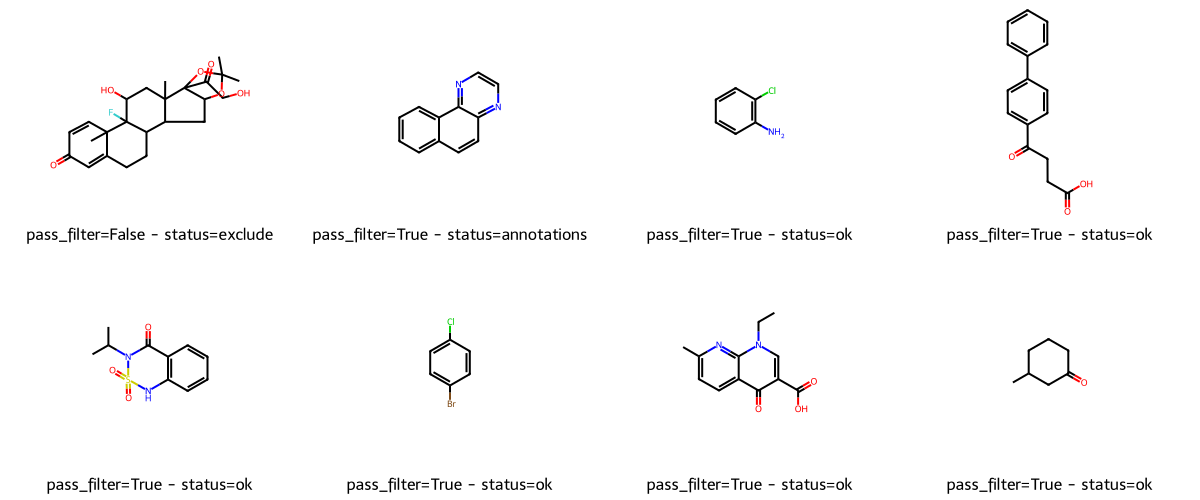

In [ ]:
rows = results.iloc[:8]

mols = rows["mol"].iloc[:8].tolist()
legends = (
    rows[["pass_filter", "status"]].apply(lambda x: f"pass_filter={x[0]} - status={x[1]}", axis=1).tolist()
)

dm.to_image(mols, legends=legends, mol_size=(300, 250))

## Eli Lilly Demerits Filters

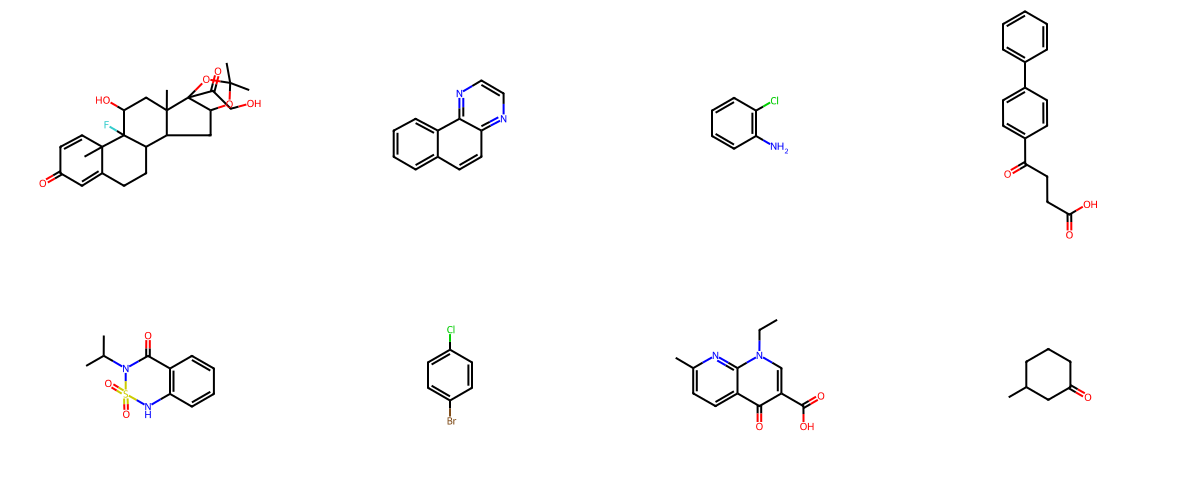

In [ ]:
# Load a dataset
data = dm.data.solubility()
data = data.sample(50, random_state=20)

dm.to_image(data.iloc[:8]["mol"].tolist(), mol_size=(300, 250))

In [ ]:
from medchem.structural.lilly_demerits import LillyDemeritsFilters

dfilter = LillyDemeritsFilters()

In [ ]:
results = dfilter(
    mols=data["mol"].tolist(),
    n_jobs=-1,
    progress=True,
    progress_leave=True,
    scheduler="threads",
)

results.head()

,smiles,reasons,step,demerit_score,status,pass_filter,mol
0,CC1(C)OC2CC3C4CCC5=CC(=O)C=CC5(C)C4(F)C(O)CC3(...,michael_rejected,2,NaN,exclude,False,<rdkit.Chem.rdchem.Mol object at 0x7f58d6f23530>
1,C1=CC2=C(C=C1)C1=NC=CN=C1C=C2,phenanthrene_het:D60,2,60.0,flag,True,<rdkit.Chem.rdchem.Mol object at 0x7f58d66f9c40>
2,NC1=CC=CC=C1Cl,"aniline_h_newd:D50,aniline_h_ewd:D10",2,60.0,flag,True,<rdkit.Chem.rdchem.Mol object at 0x7f5a7da61ee0>
3,O=C(O)CCC(=O)C1=CC=C(C2=CC=CC=C2)C=C1,NaN,2,0.0,ok,True,<rdkit.Chem.rdchem.Mol object at 0x7f58d6da4c10>
4,CC(C)N1C(=O)C2=CC=CC=C2NS1(=O)=O,NaN,2,0.0,ok,True,<rdkit.Chem.rdchem.Mol object at 0x7f58d5a5b610>


---

-- The End :-)